In [19]:
import pandas as pd
import numpy as np


# Load the master spreadsheet with ALL of the data
df = pd.read_csv('ammoniatest4(1).csv')

# Ensure time series is sorted by ID and run time
df = df.sort_values(by=['Sample', 'run time'])

# Group by each experimental run
results = []

for sample_id, group in df.groupby('Sample'):
# Extract values - give alias to all columns we want to extract
    time = group['run time'].values # in minutes
    Cin = group['influent mg/m^3'].values #(mg/m3)
    Cout = group['effluent mg/m^3'].values
    Q = group['Flow Rate'].iloc[0] # L/s, assumed constant (lock the first row si
    m = group['mass(g)'].iloc[0] # adsorbent mass in g
    temp = group['Biochar Temp'].iloc[0] #pyrolysis temp (C)
    ptime = group['Time'].iloc[0] #pyrolysis time (min)
    feed = group['Feed'].iloc[0] #Feedstock (WC/R)
    RT = group['Room Temp'].iloc[0] #Room Temperature (C)
    RH = group['Relative Humidity'].iloc[0] #Relative Humidity (%)
    pH = group['pH'].iloc[0] #pH
    Yield = group['Yield'].iloc[0] #yield
# Calculate the area under the (Cin - Cout) curve over time
    delta_C = Cin - Cout
    adsorbed_mass = Q *(1/1000)* np.trapz(delta_C, x=time) # total adsorbed ma
# Calculate adsorption capacity q (mg adsorbed / g of adsorbent)
    q = adsorbed_mass / m
    results.append({
        'Sample': sample_id,
        'Adsorption Capacity (mg/g)': q,
        'Pyrolysis Temp (C)' : temp,
        'Pyrolysis Time (min)': ptime,
        'Feedstock' : feed,
        'Room Temp (C)': RT,
        'Relative Humidity (%)': RH,
        'pH': pH,
        'Yield': Yield
    })
# Convert to DataFrame for viewing/export <- THIS IS THE DATAFRAME YOU WILL USE FOR
results_df = pd.DataFrame(results)
print(results_df)


             Sample  Adsorption Capacity (mg/g)  Pyrolysis Temp (C)  \
0       R-400-30-AD                   11.694444                 400   
1        R-400-60-A                    8.629250                 400   
2       R-400-60-AD                    7.370563                 400   
3        R-500-15-A                    7.461300                 500   
4   R-500-60-A-M1-B                    5.075875                 500   
5       R-500-60-AD                    9.054500                 500   
6        R-600-15-A                    4.442900                 600   
7       R-600-30-AD                    7.991174                 600   
8       R-600-30-AM                    6.050975                 600   
9       WC-400-15-A                    7.545014                 400   
10     WC-400-15-AD                    3.714646                 400   
11      WC-400-30-A                    5.484500                 400   
12     WC-400-30-AD                    3.180625                 400   
13    

R-squared: 0.246
R-squared1: 0.364


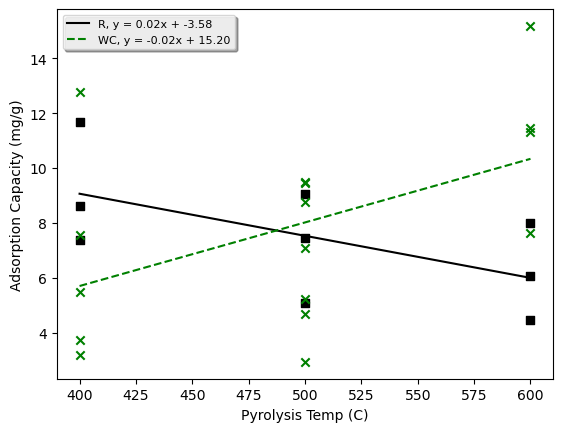

In [58]:
import pylab

column_data1 = results_df['Feedstock']
column_data2 = results_df['Adsorption Capacity (mg/g)']

target_id = 'R'

filtered_data = results_df[results_df['Feedstock'] == target_id]

column_data5 = filtered_data['Adsorption Capacity (mg/g)']
column_data6 = filtered_data['Pyrolysis Temp (C)']

Rregression = np.polyfit(column_data6,column_data5,1)
Rregression3 = np.polyfit(column_data6, column_data5,2)

target_id = 'WC'

filtered_data = results_df[results_df['Feedstock'] == target_id]

column_data3 = filtered_data['Adsorption Capacity (mg/g)']
column_data4 = filtered_data['Pyrolysis Temp (C)']

WCregression = np.polyfit(column_data4,column_data3,1)
WCregression3 = np.polyfit(column_data4, column_data3,2)

from scipy.stats import linregress

slope5, intercept5, r_value5, p_value5, std_err5 = linregress(column_data4, column_data3)

slope6, intercept6, r_value6, P_value6, std_err6 = linregress(column_data6, column_data5)

x5 = f"{slope5:.2f}"
x6 = f"{intercept5:.2f}"
x7 = f"{slope6:.2f}"
x8 = f"{intercept6:.2f}"

r_squared5 = r_value5 ** 2
print(f"R-squared: {r_squared5:.3f}")
r_squared6 = r_value6 ** 2
print(f"R-squared1: {r_squared6:.3f}")


pylab.scatter(column_data6,column_data5, c = 'k', marker = 's')
pylab.scatter(column_data4,column_data3, c = 'g', marker = 'x')
pylab.plot(column_data6,np.polyval(Rregression, column_data6), c = 'k', label = "R, y = {}x + {}".format(x5,x6))
pylab.plot(column_data4,np.polyval(WCregression, column_data4), c = 'g', linestyle = '--', label = "WC, y = {}x + {}".format(x7,x8))
pylab.xlabel('Pyrolysis Temp (C)')
pylab.ylabel('Adsorption Capacity (mg/g)')
pylab.legend(fancybox=True, shadow=True, framealpha = 0.8, fontsize = 8)

R-squared: 0.339
R-squared1: 0.139


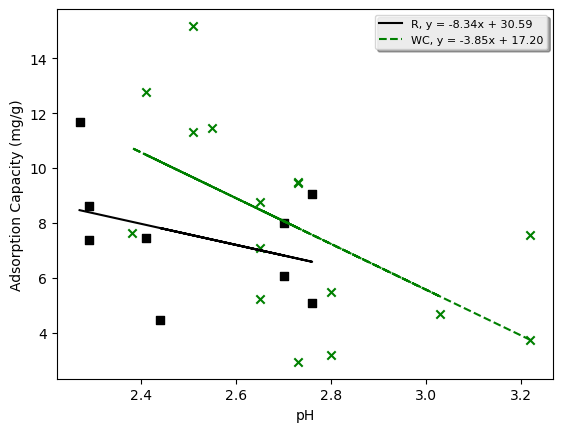

In [57]:
import pylab

column_data1 = results_df['Feedstock']
column_data2 = results_df['Adsorption Capacity (mg/g)']

target_id = 'R'

filtered_data = results_df[results_df['Feedstock'] == target_id]

column_data5 = filtered_data['Adsorption Capacity (mg/g)']
column_data7 = filtered_data['pH']

Rregression2 = np.polyfit(column_data7,column_data5,1)
Rregression3 = np.polyfit(column_data7, column_data5,2)

target_id = 'WC'

filtered_data = results_df[results_df['Feedstock'] == target_id]

column_data3 = filtered_data['Adsorption Capacity (mg/g)']
column_data9 = filtered_data['pH']

WCregression2 = np.polyfit(column_data9,column_data3,1)
WCregression3 = np.polyfit(column_data9, column_data3,2)

from scipy.stats import linregress

slope3, intercept3, r_value3, p_value3, std_err3 = linregress(column_data9, column_data3)

slope4, intercept4, r_value4, P_value4, std_err4 = linregress(column_data7, column_data5)

x1 = f"{slope3:.2f}"
x2 = f"{intercept3:.2f}"
x3 = f"{slope4:.2f}"
x4 = f"{intercept4:.2f}"

r_squared3 = r_value3 ** 2
print(f"R-squared: {r_squared3:.3f}")
r_squared4 = r_value4 ** 2
print(f"R-squared1: {r_squared4:.3f}")

pylab.scatter(column_data7,column_data5, c = 'k', marker = 's')
pylab.scatter(column_data9,column_data3, c = 'g', marker = 'x')
pylab.plot(column_data7,np.polyval(Rregression2, column_data7), c = 'k', label = "R, y = {}x + {}".format(x1,x2))
pylab.plot(column_data9,np.polyval(WCregression2, column_data9), c = 'g', linestyle = '--', label = "WC, y = {}x + {}".format(x3,x4))
pylab.xlabel('pH')
pylab.ylabel('Adsorption Capacity (mg/g)')
pylab.legend(fancybox=True, shadow=True, framealpha = 0.8, fontsize = 8)

In [4]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(column_data4, column_data3)

slope1, intercept1, r_value1, P_value1, std_err1 = linregress(column_data6, column_data5)

print(f"y = {slope:.2f}x + {intercept:.2f}")
print(f"y = {slope1:.2f}x + {intercept1:.2f}")
# R-squared value
r_squared = r_value ** 2
print(f"R-squared: {r_squared:.3f}")
r_squared1 = r_value1 ** 2
print(f"R-squared1: {r_squared1:.3f}")

y = 0.02x + -3.70
y = -0.02x + 15.17
R-squared: 0.247
R-squared1: 0.363


The equation is: y = 0.000x² + -0.066x + 27.503
The equation is: y = 0.000x² + -0.191x + 48.394


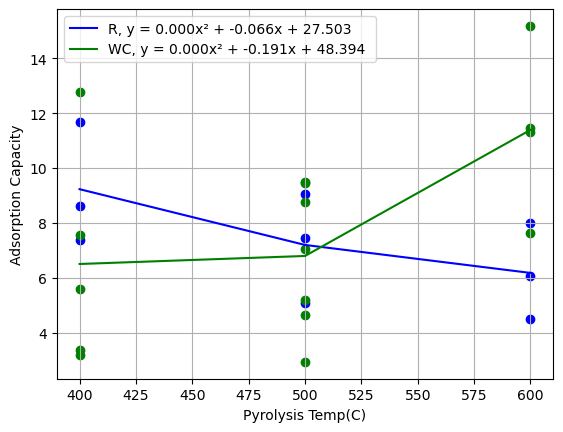

In [5]:
pylab.scatter(column_data6,column_data5, c = 'b')
pylab.scatter(column_data4,column_data3, c = 'g')
pylab.plot(column_data6,np.polyval(Rregression3, column_data6), c = 'b', label = 'R, y = 0.000x² + -0.066x + 27.503')
pylab.plot(column_data4,np.polyval(WCregression3, column_data4), c = 'g', label = "WC, y = 0.000x² + -0.191x + 48.394 ")

coefficients = np.polyfit(column_data6,column_data5, 2)
coefficients2 = np.polyfit(column_data4,column_data3, 2)

a, b, c = coefficients
print(f"The equation is: y = {a:.3f}x² + {b:.3f}x + {c:.3f}")

d, e, f = coefficients2
print(f"The equation is: y = {d:.3f}x² + {e:.3f}x + {f:.3f}")




pylab.xlabel('Pyrolysis Temp(C)')
pylab.ylabel('Adsorption Capacity')
pylab.grid()
pylab.legend()


In [9]:
from scipy.stats import linregress

slope2, intercept2, r_value2, p_value2, std_err2 = linregress(column_data18, column_data17)

slope3, intercept3, r_value3, p_value3, std_err3 = linregress(column_data20, column_data19)


print(f"y = {slope2:.2f}x + {intercept2:.2f}")
print(f"y = {slope3:.2f}x + {intercept3:.2f}")
# R-squared value
r_squared2 = r_value2 ** 2
print(f"R-squared2: {r_squared2:.3f}")
r_squared3 = r_value3 ** 2
print(f"R-squared3: {r_squared3:.3f}")

y = 22.53x + -2.76
y = -9.98x + 11.32
R-squared2: 0.329
R-squared3: 0.136
